In [1]:
"""
HiGH DIMENSIONAL ANALYSIS
PROGRAMMING EXERCISE: 04
Name: Nguyen Duc Vu Duy
Student code: 18110004
"""

'\nHiGH DIMENSIONAL ANALYSIS\nPROGRAMMING EXERCISE: 04\nName: Nguyen Duc Vu Duy\nStudent code: 18110004\n'

### Apply T-sne on Fashion-mnist dataset

In [2]:
#Import libraries
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#Load fashion mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Print the shape
print('Shape of X_train is: {}, Shape of y_train is: {}'.format(X_train.shape,y_train.shape))
print('Shape of X_test is: {}, Shape of y_test is: {}'.format(X_test.shape,y_test.shape))

Shape of X_train is: (60000, 28, 28), Shape of y_train is: (60000,)
Shape of X_test is: (10000, 28, 28), Shape of y_test is: (10000,)


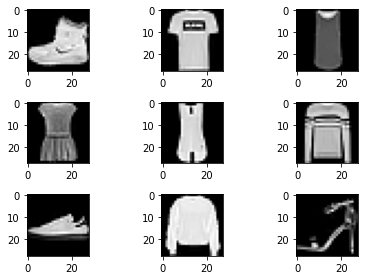

In [3]:
#Plot few images in gray scale
for i in range(9):
  # define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.tight_layout()
plt.show()

In [4]:
#Reshape X_train 
X_train=X_train.reshape(X_train.shape[0],28*28)
X_train.shape

(60000, 784)

Tính giống nhau của điểm dữ liệu $x_j$ với điểm dữ liệu $x_i$ là xác suất có điều kiện $p_{j|i}$ mà $x_i$ sẽ chọn $x_j$ là lân cận khi các lân cận được chọn tỉ lệ với mật độ xác suất của chúng dưới một Gaussian có tâm tại $x_i$:
\begin{equation*}
    p_{j|i}=\dfrac{exp(-||x_i-x_j||^2/2\sigma_i^2)}{\sum_{k\ne i}exp(-||x_i-x_j||^2/2\sigma_i^2)}
\end{equation*}

Với phần ở chiều thấp hơn $y_i$ và $y_j$ của các điểm dữ liệu có nhiều chiều $x_i, x_j$, ta có thể tính xác suất có điều kiện về tính giống nhau, ký hiệu là $q_{j|i}$:
\begin{equation*}
    q_{j|i}=\dfrac{exp(-||y_i-y_j||^2)}{\sum_{k \ne i}exp(-||y_i-y_j||^2}
\end{equation*}

Perplexity được định nghĩa là:
\begin{equation*}
    Perp(P_i)=2^{H(P_i)}
\end{equation*}
trong đó, $H(P_i)$ là shannon entropy của $P_i$ được đo bằng bits:
\begin{equation*}
    H(P_i)=-\sum_{j}p_{j|i}log_2(p_{j|i})
\end{equation*}

Để tăng tốc độ tối ưu và tránh điểm cực tiểu lân cận không tốt, ta có thể thêm 1 cụm tương đối lớn momentum.
\begin{equation*}
    Y^{(t)}=Y^{(t-1)}+\beta \dfrac{\partial C}{\partial Y}+\alpha(t)(Y^{(t-1)}-Y^{(t-2)})
\end{equation*}

Sử dụng phân phối student, ta có xác suất hợp $q_{ij}$ là:
\begin{equation*}
    q_{ij}=\dfrac{(1+||y_i-y_j||^2)^{-1}}{\sum_{k \ne l}(1+||y_k-y_l||^2)^{-1}}
\end{equation*}

Gradient lúc này là:
\begin{equation*}
    \dfrac{\partial C}{\partial y_i}=4\sum_{j}(p_{ij}-q_{ij})(y_i-y_j)(1+||y_i-y_j||^2)^{-1}
\end{equation*}



#Tóm tắt thuật toán t-sne:
Tính $p_{j|i}$ với perplexity perp

đặt $p_{ij}=\dfrac{p_{j|i}+p_{i|j}}{2n}$

Sample solution ban đầu $Y^{(0)}=\{y_1, y_2,...,y_n\}$ từ $N(0, 10^{-4}I)$

với t=1 chạy tới T:

  tính $q_{ij}$ đã cho công thức ở trên của t-sne

  tính gradient $ \dfrac{\partial C}{\partial y_i}$ theo công thức ở trên của t-sne

  đặt $ Y^{(t)}=Y^{(t-1)}+\beta \dfrac{\partial C}{\partial Y}+\alpha(t)(Y^{(t-1)}-Y^{(t-2)})$

In [5]:
#Apply pca to reduce the dimension of X_train to speed up computation on t-sne
pca=PCA(n_components=30)
X_train_pca=pca.fit_transform(X_train)
X_train_pca.shape

(60000, 30)

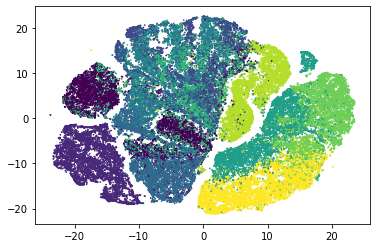

In [6]:
#Apply t-sne using sklearn.manifold
tsne = TSNE(n_components=2,n_iter=500,n_iter_without_progress=50,random_state=0)
tsne_mnist = tsne.fit_transform(X_train_pca)

#Plot the result
plt.scatter(tsne_mnist[:,0], tsne_mnist[:,1], c = y_train, s = 0.5)